In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pandas as pd

In [2]:
from nba_api.stats.endpoints.leaguedashteamptshot import LeagueDashTeamPtShot

In [3]:
headers = {
    'Host': 'stats.nba.com',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:61.0) Gecko/20100101 Firefox/61.0',
    'Accept': 'application/json, text/plain, */*',
    'Accept-Language': 'en-US,en;q=0.5',
    'Referer': 'https://stats.nba.com/',
    'Accept-Encoding': 'gzip, deflate, br',
    'Connection': 'keep-alive',
}

In [4]:
shot_clock_ranges = {
    'IMMIDIATELY': '24-22',
    'VERY_EARLY': '22-18 Very Early',
    'EARLY': '18-15 Early',
    'AVERAGE': '15-7 Average',
    'LATE': '7-4 Late',
    'VERY_LATE': '4-0 Very Late'
}

interesting_columns = [
    'FGA',
    'FGM',
    'FG3A',
    'FG3M'
]

In [5]:
def get_shot_data_for_season(season='2019-20'):
    final_data_frame = None
    for index, key in enumerate(shot_clock_ranges):
        if index == 0:
            final_data_frame = LeagueDashTeamPtShot(per_mode_simple='PerGame', headers=headers, shot_clock_range_nullable=shot_clock_ranges[key], season=season)
            final_data_frame = final_data_frame.get_data_frames()[0]
            final_data_frame = final_data_frame[['TEAM_ID', 'TEAM_NAME', 'TEAM_ABBREVIATION', 'FGA', 'FGM', 'FG3A', 'FG3M']]
            for col in interesting_columns:
                final_data_frame[f'{key}_{col}'] = final_data_frame[col]
                del final_data_frame[col]
        else:
            data_frame = LeagueDashTeamPtShot(per_mode_simple='PerGame', headers=headers, shot_clock_range_nullable=shot_clock_ranges[key], season=season)
            data_frame = data_frame.get_data_frames()[0]
            for col in interesting_columns:
                final_data_frame[f'{key}_{col}'] = data_frame[col]
        time.sleep(1)
    return final_data_frame

In [6]:
team_stats = LeagueDashTeamPtShot(per_mode_simple='PerGame', headers=headers, shot_clock_range_nullable=shot_clock_ranges['LATE'])

In [7]:
df = team_stats.get_data_frames()[0]

In [8]:
df['FGA_LATE'] = df.FGM

In [9]:
modified = df[['TEAM_ID', 'TEAM_NAME', 'TEAM_ABBREVIATION', 'FGA', 'FGM', 'FG3A', 'FG3M']]

In [10]:
modified['FGA_LATE'] = modified.FGA

c:\users\danie\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
curr_season_df = get_shot_data_for_season()

In [12]:
seasons = [
    '2013-14',
    '2014-15',
    '2015-16',
    '2016-17',
    '2017-18',
    '2018-19',
    '2019-20',
]

In [13]:
data_frames = {}

for season in seasons:
    data_frames[season] = get_shot_data_for_season(season=season)


In [14]:
averaged_data_frames = {}

for key in data_frames:
    averaged_data_frames[key] = data_frames[key].mean()

In [15]:
average_fga = []
time_shot_stats = {}

In [16]:
for column in interesting_columns:
    for index, season in enumerate(averaged_data_frames):
        average_fga.append(averaged_data_frames[season].AVERAGE_FGA)
        for key in shot_clock_ranges:
            if index == 0:
                time_shot_stats[f'{key}_{column}'] = [averaged_data_frames[season][f'{key}_{column}']]
            else:
                time_shot_stats[f'{key}_{column}'].append(averaged_data_frames[season][f'{key}_{column}'])

In [17]:
time_shot_stats

{'IMMIDIATELY_FGA': [4.281333333333333,
  4.168333333333333,
  3.8033333333333332,
  4.159,
  4.379000000000001,
  2.6570000000000005,
  2.825],
 'VERY_EARLY_FGA': [10.206666666666669,
  10.283999999999997,
  9.825999999999999,
  10.883333333333333,
  12.072333333333331,
  12.68,
  12.438333333333336],
 'EARLY_FGA': [10.538999999999998,
  11.198666666666666,
  11.561666666666666,
  13.170333333333335,
  14.034,
  15.726666666666667,
  15.834666666666665],
 'AVERAGE_FGA': [35.10566666666667,
  35.914,
  34.444,
  36.72366666666667,
  36.007,
  42.153666666666666,
  42.44766666666668],
 'LATE_FGA': [8.503666666666668,
  8.883000000000001,
  8.217333333333332,
  8.080333333333334,
  7.726333333333334,
  8.087333333333335,
  7.74966666666667],
 'VERY_LATE_FGA': [9.576,
  8.298,
  11.746333333333334,
  7.605666666666665,
  6.879666666666665,
  7.715333333333334,
  7.5023333333333335],
 'IMMIDIATELY_FGM': [2.5079999999999996,
  2.3973333333333335,
  2.184333333333334,
  2.405333333333333,
  

In [18]:
plt.style.use('fivethirtyeight')

Text(0.5, 1.0, 'FGA based on Shot Clock')

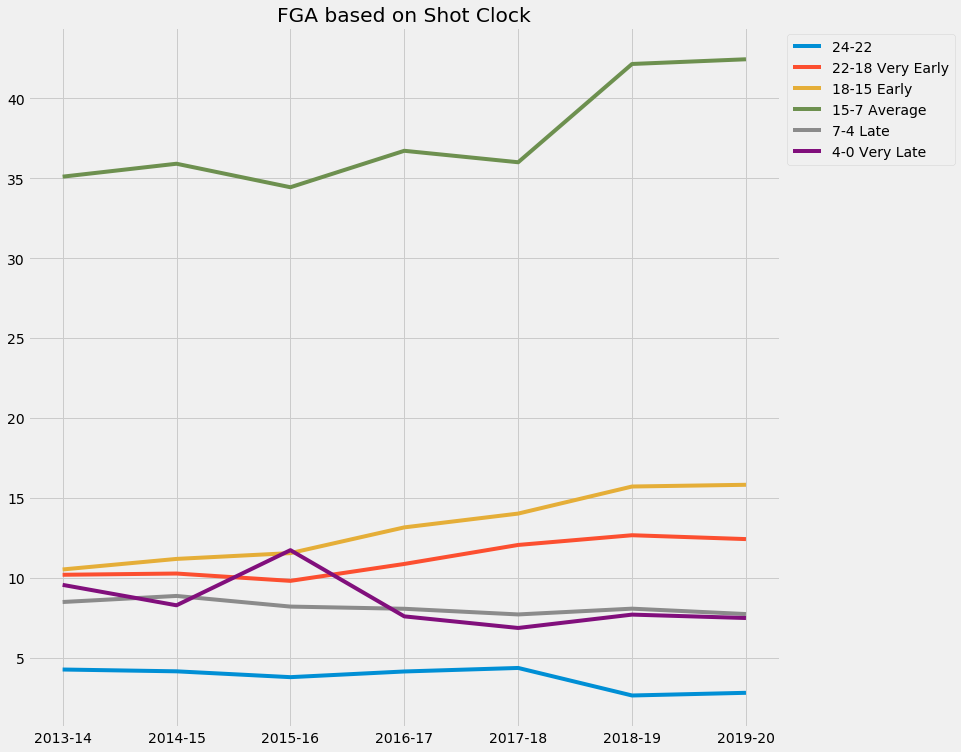

In [19]:
plt.figure(figsize=(12, 12))
plt.plot(seasons, time_shot_stats['IMMIDIATELY_FGA'], label=shot_clock_ranges['IMMIDIATELY'])
plt.plot(seasons, time_shot_stats['VERY_EARLY_FGA'], label=shot_clock_ranges['VERY_EARLY'])
plt.plot(seasons, time_shot_stats['EARLY_FGA'], label=shot_clock_ranges['EARLY'])
plt.plot(seasons, time_shot_stats['AVERAGE_FGA'], label=shot_clock_ranges['AVERAGE'])
plt.plot(seasons, time_shot_stats['LATE_FGA'], label=shot_clock_ranges['LATE'])
plt.plot(seasons, time_shot_stats['VERY_LATE_FGA'], label=shot_clock_ranges['VERY_LATE'])

plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.title('FGA based on Shot Clock')

Text(0.5, 1.0, 'FG3A based on Shot Clock')

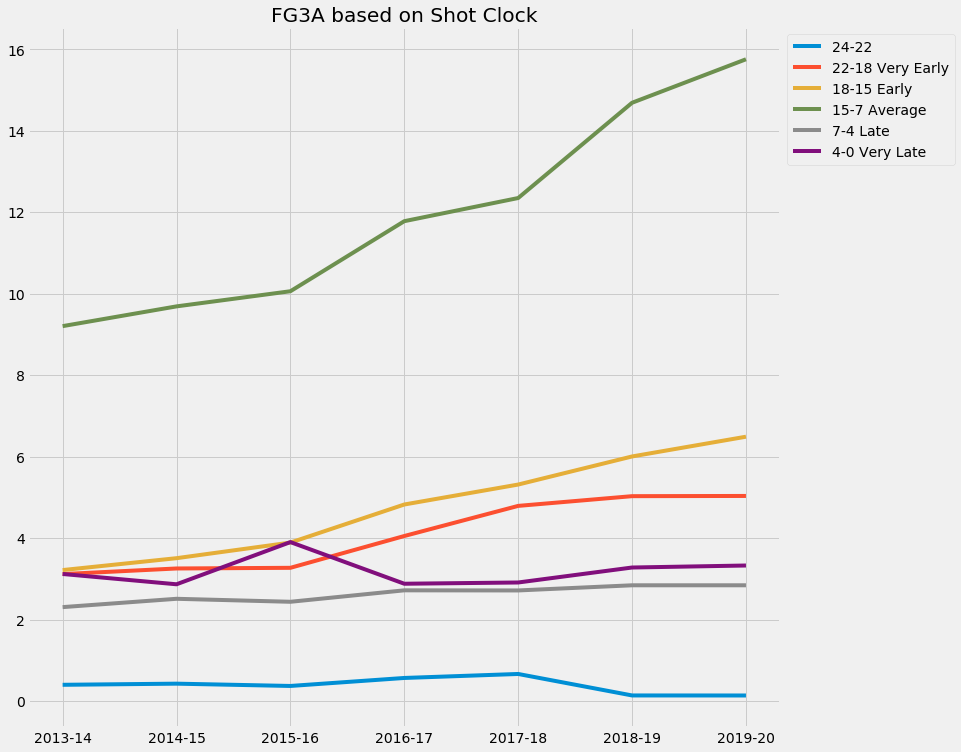

In [20]:
plt.figure(figsize=(12, 12))
plt.plot(seasons, time_shot_stats['IMMIDIATELY_FG3A'], label=shot_clock_ranges['IMMIDIATELY'])
plt.plot(seasons, time_shot_stats['VERY_EARLY_FG3A'], label=shot_clock_ranges['VERY_EARLY'])
plt.plot(seasons, time_shot_stats['EARLY_FG3A'], label=shot_clock_ranges['EARLY'])
plt.plot(seasons, time_shot_stats['AVERAGE_FG3A'], label=shot_clock_ranges['AVERAGE'])
plt.plot(seasons, time_shot_stats['LATE_FG3A'], label=shot_clock_ranges['LATE'])
plt.plot(seasons, time_shot_stats['VERY_LATE_FG3A'], label=shot_clock_ranges['VERY_LATE'])

plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.title('FG3A based on Shot Clock')

## General stats

In [21]:
from nba_api.stats.endpoints.leaguedashteamstats import LeagueDashTeamStats

In [22]:
per_g_seasons = [f'{season}-{str(season+1)[-2:]}' for season in range(1998, 2020)]

In [23]:
fga, fg3a = [], []

for season in per_g_seasons:
    stats = LeagueDashTeamStats(per_mode_detailed='PerGame', season=season, headers=headers).get_data_frames()[0]
    fga.append(stats.FGA.mean())
    fg3a.append(stats.FG3A.mean())
    print(f'Done with {season}')
    time.sleep(1)

Done with 1998-99
Done with 1999-00
Done with 2000-01
Done with 2001-02
Done with 2002-03
Done with 2003-04
Done with 2004-05
Done with 2005-06
Done with 2006-07
Done with 2007-08
Done with 2008-09
Done with 2009-10
Done with 2010-11
Done with 2011-12
Done with 2012-13
Done with 2013-14
Done with 2014-15
Done with 2015-16
Done with 2016-17
Done with 2017-18
Done with 2018-19
Done with 2019-20


([<matplotlib.axis.XTick at 0x1a266520408>,
 <a list of 22 Text xticklabel objects>)

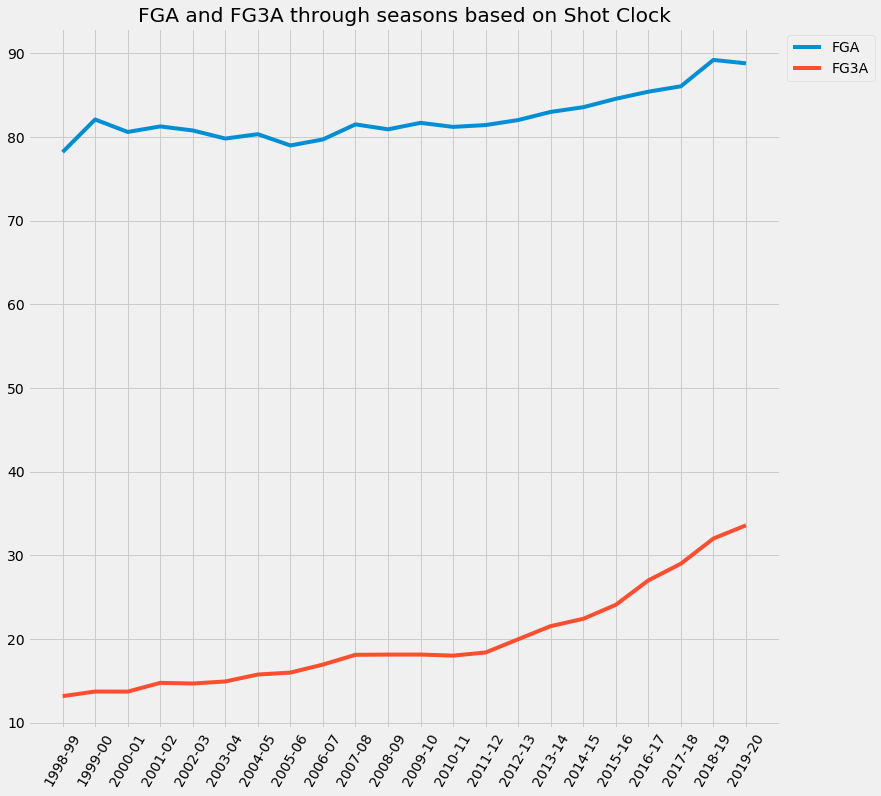

In [24]:
plt.figure(figsize=(12, 12))
plt.plot(per_g_seasons, fga, label='FGA')
plt.plot(per_g_seasons, fg3a, label='FG3A')


plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.title('FGA and FG3A through seasons based on Shot Clock')
plt.xticks(per_g_seasons, rotation=60, ha='center')

## Number of shots per zone

In [35]:
import requests

In [25]:
from nba_api.stats.endpoints.leaguedashteamshotlocations import LeagueDashTeamShotLocations

In [30]:
stats = LeagueDashTeamShotLocations(per_mode_detailed='PerGame', headers=headers)

In [34]:
url = "https://stats.nba.com/stats/leaguedashteamshotlocations?Conference=&DateFrom=&DateTo=&DistanceRange=By+Zone&Division=&GameScope=&GameSegment=&LastNGames=0&LeagueID=00&Location=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=PerGame&Period=0&PlayerExperience=&PlayerPosition=&PlusMinus=N&Rank=N&Season=2019-20&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StarterBench=&TeamID=0&VsConference=&VsDivision="

In [36]:
resp = requests.get(url, headers=headers)

In [39]:
result = resp.json()['resultSets']

In [50]:
df = pd.DataFrame(data=result['rowSet'], columns=result['headers'][1]['columnNames'])

In [55]:
columns = ['TEAM_ID', 'TEAM_NAME']

for item in result['headers'][0]['columnNames']:
    columns.append(f"{item.replace(' ', '_').replace('(','').replace(')','')}_FGM")
    columns.append(f"{item.replace(' ', '_').replace('(','').replace(')','')}_FGA")
    columns.append(f"{item.replace(' ', '_').replace('(','').replace(')','')}_FG_PCT")

In [57]:
df = pd.DataFrame(data=result['rowSet'], columns=columns)

In [ ]:
columns = ['TEAM_ID', 'TEAM_NAME']

for item in result['headers'][0]['columnNames']:
    columns.append(f"{item.replace(' ', '_').replace('(','').replace(')','')}_FGM")
    columns.append(f"{item.replace(' ', '_').replace('(','').replace(')','')}_FGA")
    columns.append(f"{item.replace(' ', '_').replace('(','').replace(')','')}_FG_PCT")

In [68]:
restricted_area_fga = []
paint_fga = []
mid_range_fga = []
left_corner_3_fga = []
right_corner_3_fga = []
above_the_break_3_fga = []
backourt_fga = []

for season in per_g_seasons:
    url = f"https://stats.nba.com/stats/leaguedashteamshotlocations?Conference=&DateFrom=&DateTo=&DistanceRange=By+Zone&Division=&GameScope=&GameSegment=&LastNGames=0&LeagueID=00&Location=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=PerGame&Period=0&PlayerExperience=&PlayerPosition=&PlusMinus=N&Rank=N&Season={season}&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StarterBench=&TeamID=0&VsConference=&VsDivision="
    resp = requests.get(url, headers=headers)
    result = resp.json()['resultSets']
    df = pd.DataFrame(data=result['rowSet'], columns=columns)
    restricted_area_fga.append(df['Restricted_Area_FGA'].mean())
    paint_fga.append(df['In_The_Paint_Non-RA_FGA'].mean())
    mid_range_fga.append(df['Mid-Range_FGA'].mean())
    left_corner_3_fga.append(df['Left_Corner_3_FGA'].mean())
    right_corner_3_fga.append(df['Right_Corner_3_FGA'].mean())
    above_the_break_3_fga.append(df['Above_the_Break_3_FGA'].mean())
    backourt_fga.append(df['Backcourt_FGA'].mean())
    print(f'Done with {season}')
    time.sleep(1)

Done with 1998-99
Done with 1999-00
Done with 2000-01
Done with 2001-02
Done with 2002-03
Done with 2003-04
Done with 2004-05
Done with 2005-06
Done with 2006-07
Done with 2007-08
Done with 2008-09
Done with 2009-10
Done with 2010-11
Done with 2011-12
Done with 2012-13
Done with 2013-14
Done with 2014-15
Done with 2015-16
Done with 2016-17
Done with 2017-18
Done with 2018-19
Done with 2019-20


In [70]:
names = result['headers'][0]['columnNames']

In [71]:
names

['Restricted Area',
 'In The Paint (Non-RA)',
 'Mid-Range',
 'Left Corner 3',
 'Right Corner 3',
 'Above the Break 3',
 'Backcourt']

Text(0.5, 1.0, 'FGA based on Shot Clock')

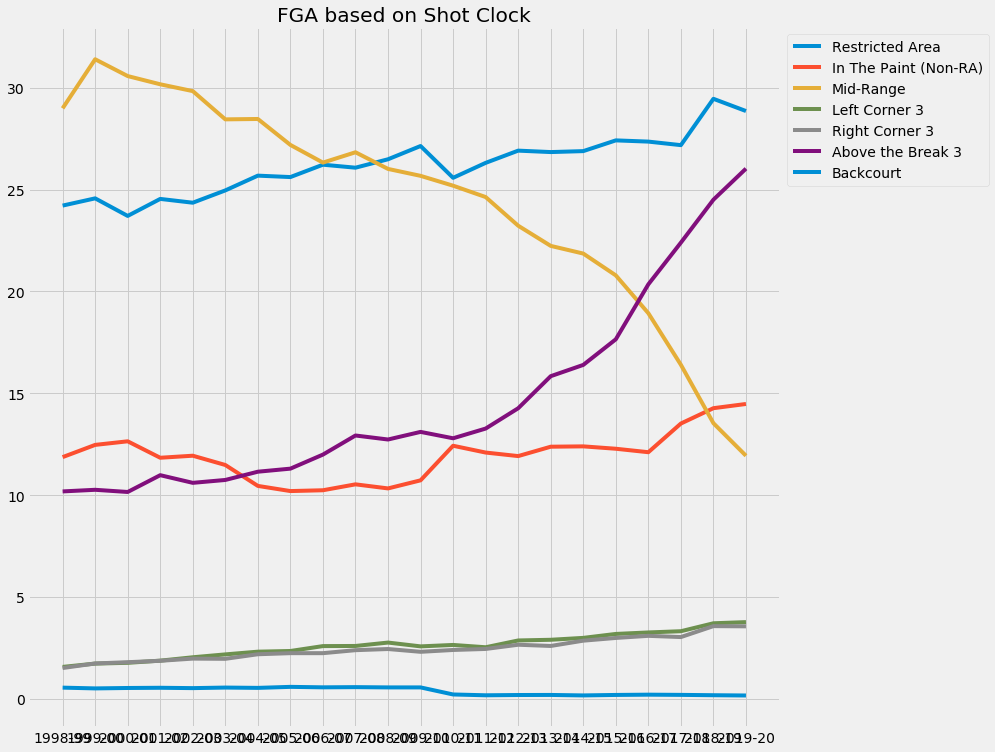

In [72]:
plt.figure(figsize=(12, 12))

plt.plot(per_g_seasons, restricted_area_fga, label=names[0])
plt.plot(per_g_seasons, paint_fga, label=names[1])
plt.plot(per_g_seasons, mid_range_fga, label=names[2])
plt.plot(per_g_seasons, left_corner_3_fga, label=names[3])
plt.plot(per_g_seasons, right_corner_3_fga, label=names[4])
plt.plot(per_g_seasons, above_the_break_3_fga, label=names[5])
plt.plot(per_g_seasons, backourt_fga, label=names[6])

plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.title('FGA based on Shot Clock')